# Sentiment Analysis

## Sentiment of Routine

In [29]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
Biden,how you doing man im well well first of all t...,Vice President Joe Biden
Trump,how are you doing thank you very much chris i...,President Donald J. Trump
Wallace,good evening from the health education campus...,Chris Wallace


In [30]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
Biden,how you doing man im well well first of all t...,Vice President Joe Biden,0.106739,0.472144
Trump,how are you doing thank you very much chris i...,President Donald J. Trump,0.060675,0.459219
Wallace,good evening from the health education campus...,Chris Wallace,0.140686,0.409476


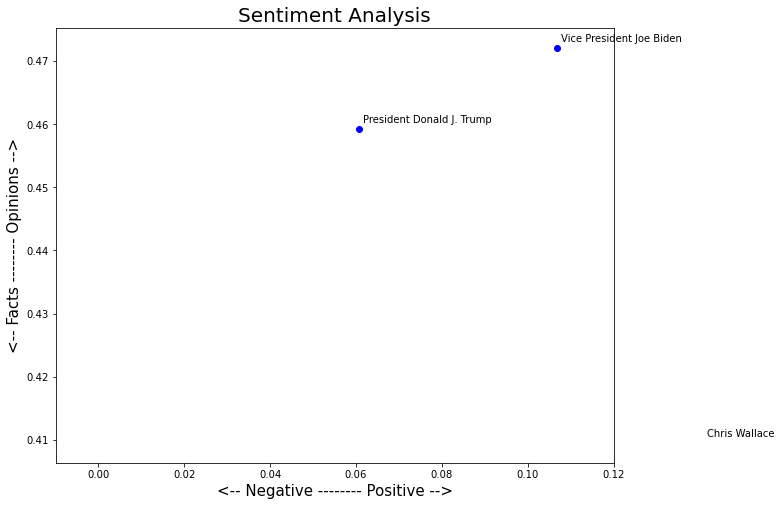

In [31]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, speaker in enumerate(data.index):
    x = data.polarity.loc[speaker]
    y = data.subjectivity.loc[speaker]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [32]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [33]:
# Let's take a look at our data again
data

,transcript,full_name,polarity,subjectivity
Biden,how you doing man im well well first of all t...,Vice President Joe Biden,0.106739,0.472144
Trump,how are you doing thank you very much chris i...,President Donald J. Trump,0.060675,0.459219
Wallace,good evening from the health education campus...,Chris Wallace,0.140686,0.409476


In [34]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
#list_pieces

In [35]:
# The list has 10 elements, one for each transcript
#len(list_pieces)

In [36]:
# Each transcript has been split into 10 pieces of text
#len(list_pieces[0])

In [37]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
# polarity_transcript

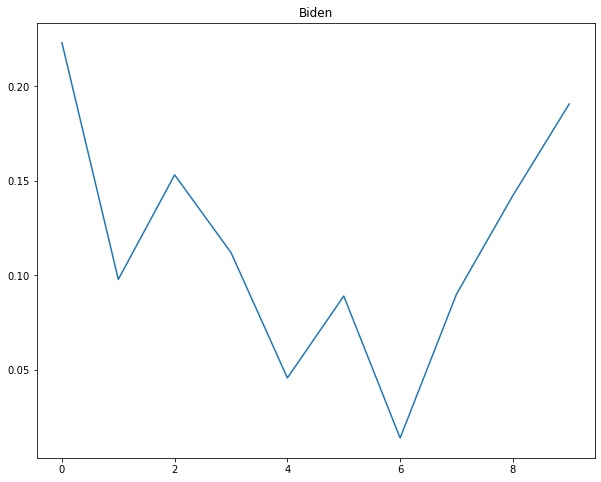

In [38]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

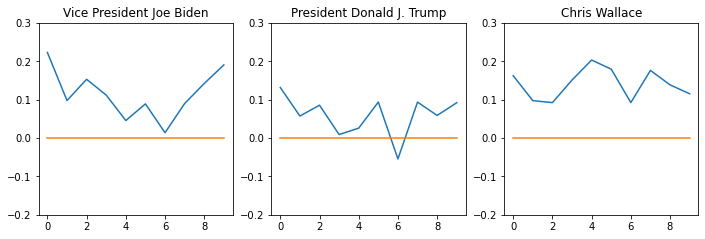

In [39]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

Ali Wong stays generally positive throughout her routine. Similar comedians are Louis C.K. and Mike Birbiglia.

On the other hand, you have some pretty different patterns here like Bo Burnham who gets happier as time passes and Dave Chappelle who has some pretty down moments in his routine.

## Additional Exercises

1. Modify the number of sections the comedy routine is split into and see how the charts over time change.

In [40]:
biden = data['transcript'][0]
trump = data['transcript'][1]
wallace = data['transcript'][2]

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text

my_stop_words = text.ENGLISH_STOP_WORDS.union(["donald", "trump", "ve", "got"])

corpus = {'Moderator': wallace, 'Biden':biden, 'Trump':trump}

# calc tf-idf for 3-word phrases
tfidf = TfidfVectorizer(stop_words = my_stop_words, ngram_range=(3,3))
tfs = tfidf.fit_transform(corpus.values())

feature_names = tfidf.get_feature_names()
feature_names
corpus_index = [n for n in corpus]
rows, cols = tfs.nonzero()

data = pd.DataFrame(tfs.T.todense(), index=feature_names, columns=corpus_index)

In [42]:
tfs.T.todense()

matrix([[0.        , 0.0188486 , 0.        ],
        [0.        , 0.0188486 , 0.        ],
        [0.        , 0.        , 0.01769747],
        ...,
        [0.        , 0.        , 0.01769747],
        [0.01878784, 0.        , 0.        ],
        [0.        , 0.0188486 , 0.        ]])

In [43]:
data.sort_values("Biden",ascending=False).head(15)["Biden"].reset_index()

,index,Biden
0,affordable care act,0.094243
1,president united states,0.075394
2,going make sure,0.075394
3,theyre going vote,0.056546
4,im going eliminate,0.056546
5,green new deal,0.044529
6,number going make,0.037697
7,going eliminate tax,0.037697
8,good paying jobs,0.037697
9,advantage tax code,0.037697


In [44]:
data.sort_values("Trump",ascending=False).head(15)["Trump"].reset_index()

,index,Trump
0,let just tell,0.106185
1,half million dollars,0.106185
2,im elected years,0.053092
3,going pack court,0.053092
4,agreed bernie sanders,0.053092
5,know people died,0.053092
6,did phenomenal job,0.053092
7,wants shut country,0.053092
8,just tell joe,0.053092
9,dont know people,0.053092
